In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from datetime import datetime
from pandas.plotting import scatter_matrix

In [228]:
pd.set_option('display.max_rows', 50)
plt.rcParams['figure.figsize'] = [17, 6]
plt.rcParams.update({'font.size': 14})

# France Energy Production Prediction (Assignment 2)

### Wind Energy Production

In [6]:
wind_df = pd.read_csv("Datasets/wind_energy_production.csv", names=['Date', 'Energy'])
wind_df['Date']= pd.to_datetime(wind_df['Date']) 
wind_df.set_index('Date', inplace=True)

In [7]:
wind_df['Energydiff'] = wind_df.Energy.diff()
wind_df['Energydiff18'] = wind_df.Energy.diff(18)

In [8]:
wind_df.head()

,Energy,Energydiff,Energydiff18
Date,,,
2017-01-01 00:00:00,0,NaN,NaN
2017-01-01 01:00:00,0,0.0,NaN
2017-01-01 02:00:00,0,0.0,NaN
2017-01-01 03:00:00,0,0.0,NaN
2017-01-01 04:00:00,0,0.0,NaN


In [9]:
wind_df.shape

(30890, 3)

In [10]:
wind_df.describe()
# wind_df.info()

,Energy,Energydiff,Energydiff18
count,30890.000000,30889.000000,30872.000000
mean,17585.039657,0.663667,13.564071
std,19175.708575,4718.105684,18077.506041
min,0.000000,-44500.000000,-88000.000000
25%,3500.000000,-1500.000000,-8000.000000
50%,10500.000000,0.000000,0.000000
75%,25000.000000,1500.000000,8000.000000
max,89000.000000,47500.000000,88000.000000


In [11]:
wind_df[(wind_df.index >= pd.datetime(2020,5,1,0)) & 
        (wind_df.index < pd.datetime(2021,1,1,0))].describe()


,Energy,Energydiff,Energydiff18
count,1706.000000,1706.000000,1706.000000
mean,21023.080305,-29.308324,-474.648300
std,18063.076909,6180.545029,20844.636641
min,0.000000,-44500.000000,-67000.000000
25%,7000.000000,-2500.000000,-11500.000000
50%,15000.000000,0.000000,-250.000000
75%,30500.000000,2500.000000,9500.000000
max,88000.000000,46000.000000,88000.000000


[]

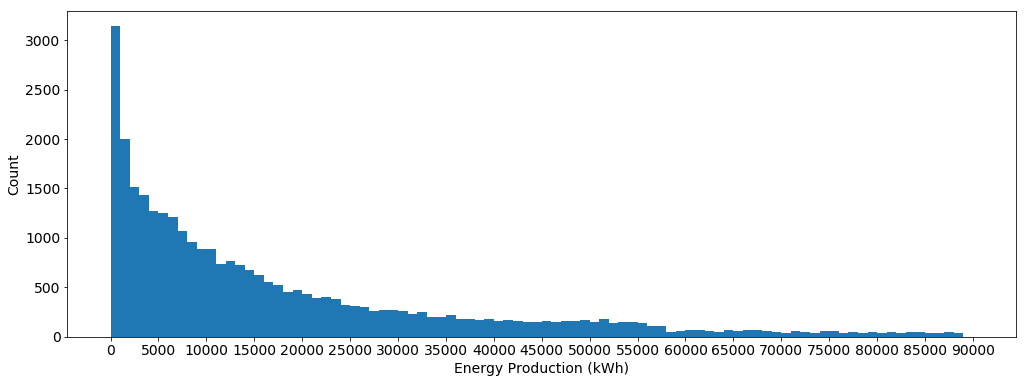

In [229]:
plt.hist(wind_df[(wind_df.index >= pd.datetime(2016,5,25,0)) &
                 (wind_df.index < pd.datetime(2021,1,1,0))].Energy,
             bins=range(0, 90001, 1000))
plt.xticks(range(0, 90001, 5000))
plt.xlabel('Energy Production (kWh)')
plt.ylabel('Count')
plt.plot()

In [13]:
print("Num. unique predicted values (categories) : ", len(set(wind_df.Energy)))

Num. unique predicted values (categories) :  284


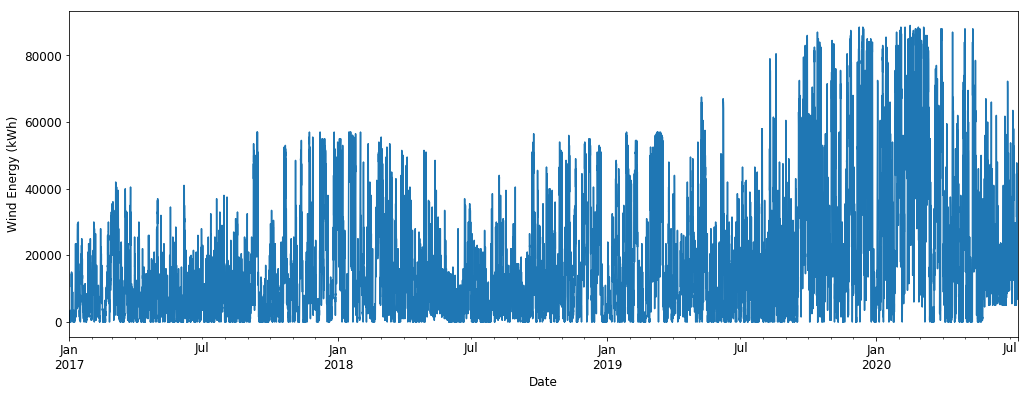

In [222]:
wind_df[(wind_df.index >= pd.datetime(2015,6,1,0)) & 
        (wind_df.index < pd.datetime(2021,2,1,0))].Energy.plot()
plt.ylabel('Wind Energy (kWh)')

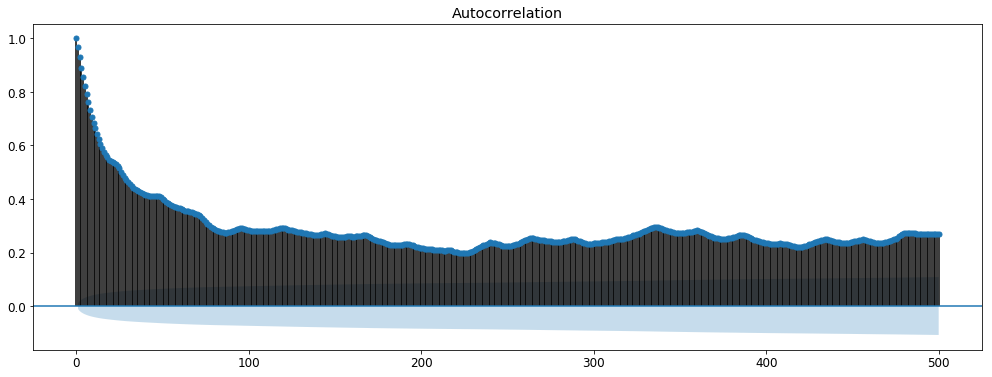

In [15]:
plot_acf(wind_df.Energy,lags=500)
pyplot.show()

# Another method for correlation
# idx = range(500)
# cor_list = pd.Series([wind_df.Energy.shift(periods=i).corr(wind_df.Energy) for i in idx], index=idx)
# cor_list.plot(grid=True)

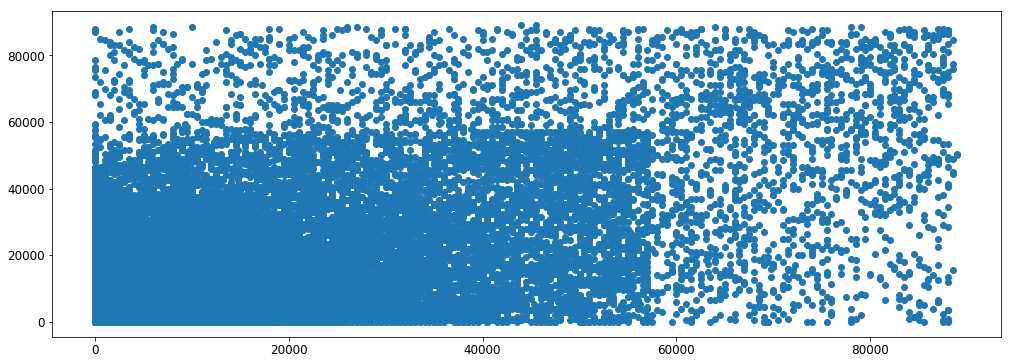

In [16]:
plt.scatter(wind_df.Energy, wind_df.Energy.shift(18))

- very high correlation with pervious value but when you look at the graph dosent seem so

### Energy Diff

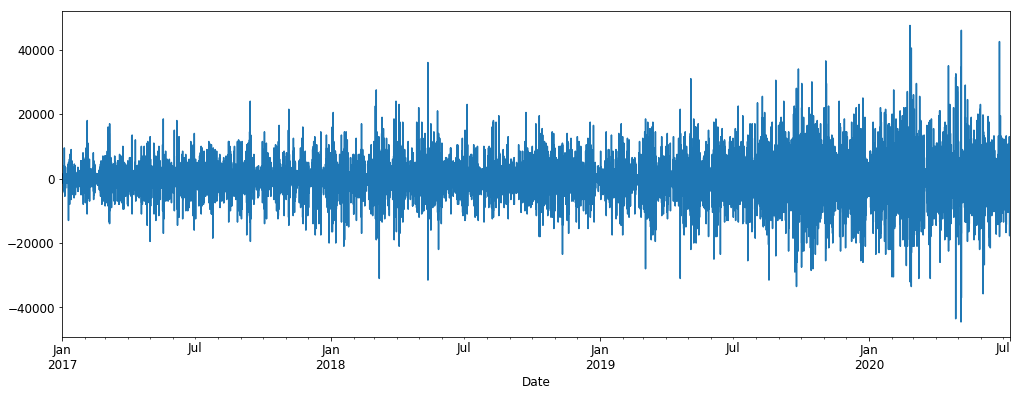

In [17]:
wind_df[(wind_df.index >= pd.datetime(2010,1,1,0)) & (wind_df.index < pd.datetime(2021,1,9,0))].Energydiff.plot()

- looks like you are predicting a high variance period

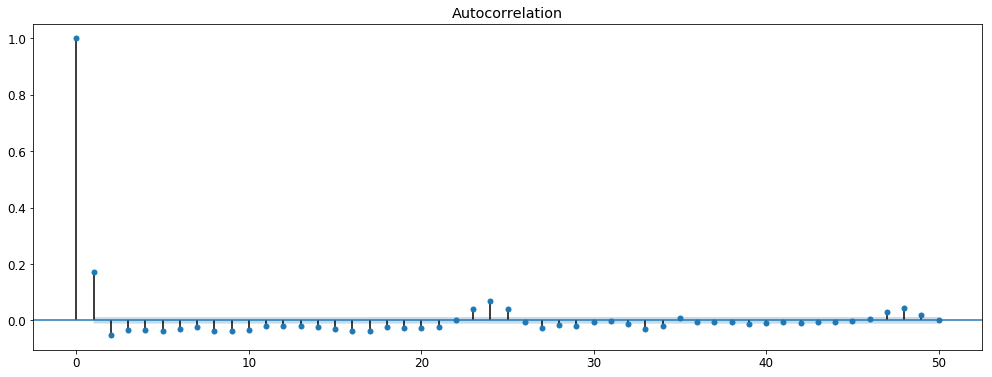

In [18]:
plot_acf(wind_df.Energydiff.dropna(),lags=50)
pyplot.show()

- there is still some correlation 
- every 24hrs there is +ve correlation

### Energy diff18

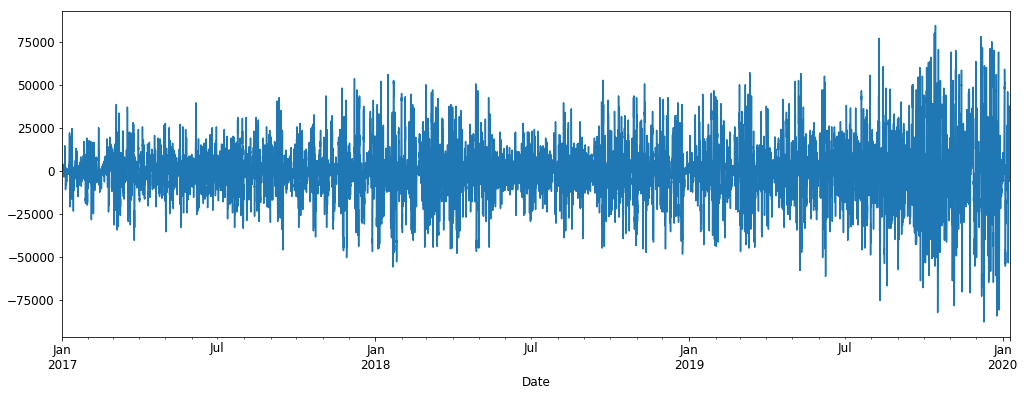

In [19]:
wind_df[(wind_df.index >= pd.datetime(2017,1,1,0)) & (wind_df.index < pd.datetime(2020,1,10,0))].Energydiff18.plot()

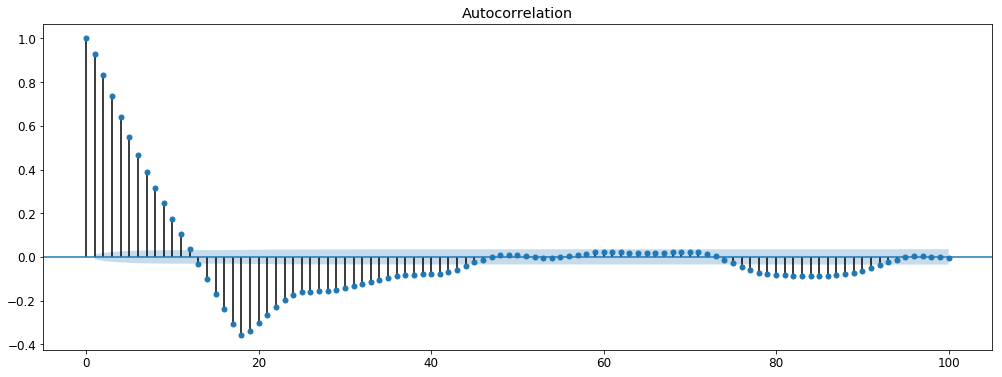

In [20]:
plot_acf(wind_df.Energydiff18.dropna(),lags=100)
pyplot.show()

- interesting that autocorrelation increases when lag increases

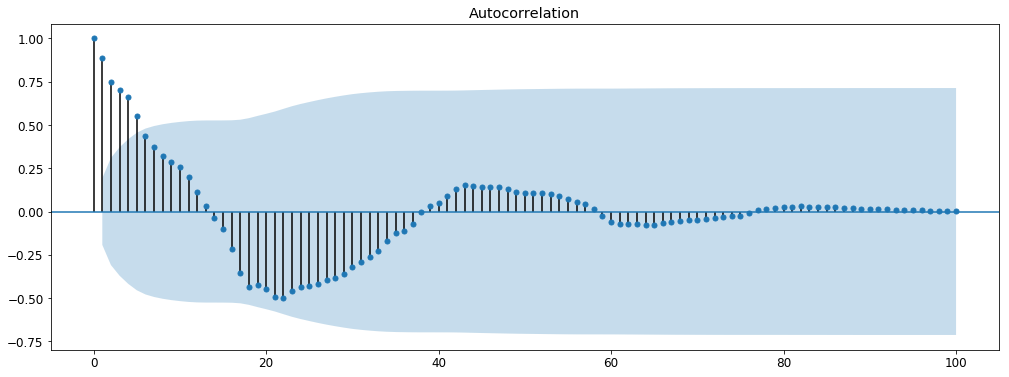

In [21]:
plot_acf(wind_df[:pd.datetime(2017,1,6)].Energydiff18.dropna(),lags=100)
pyplot.show()

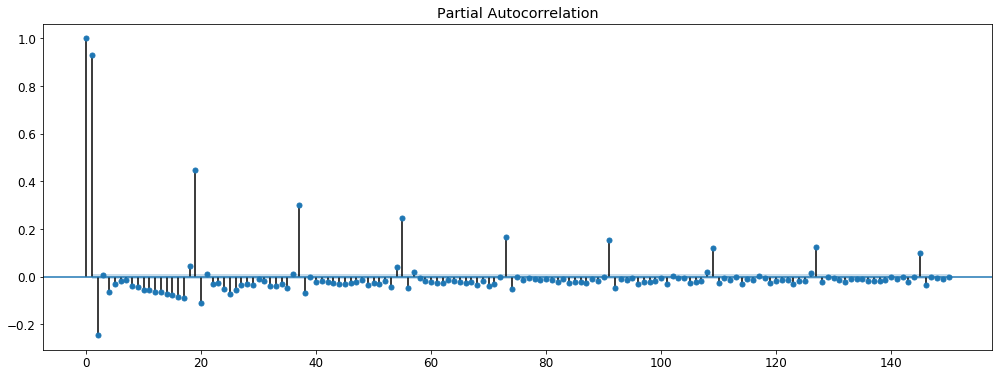

In [22]:
# fig, ax = plt.subplots(figsize=(20, 5))
plot_pacf(wind_df.Energydiff18.dropna(),lags=150)
plt.show()

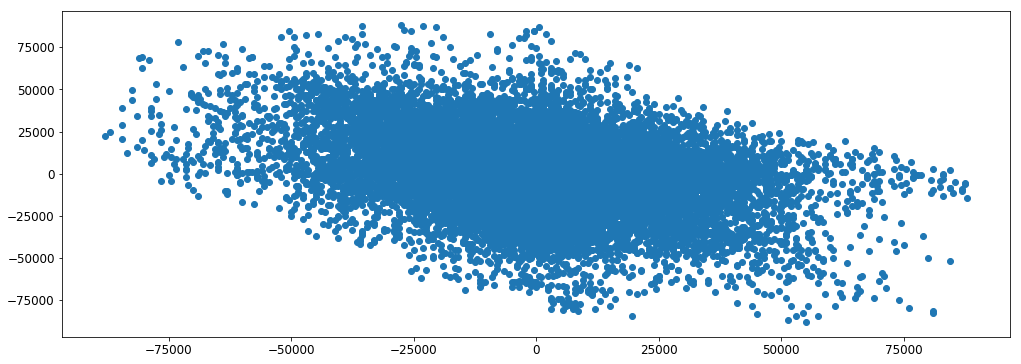

In [23]:
plt.scatter(wind_df.Energydiff18, wind_df.Energydiff18.shift(18))

### Seasonality (by aggregation)

In [24]:
wdf = wind_df.reset_index(drop=False)
wdf['year'] = wdf['Date'].dt.year
wdf['month'] = wdf['Date'].dt.month
wdf['monthday'] = wdf['Date'].dt.day
wdf['weekday'] = wdf['Date'].dt.weekday
wdf['hour'] = wdf['Date'].dt.hour
wdf['week'] = wdf['Date'].dt.week

In [25]:
wdf.head()

,Date,Energy,Energydiff,Energydiff18,year,month,monthday,weekday,hour,week
0,2017-01-01 00:00:00,0,NaN,NaN,2017,1,1,6,0,52
1,2017-01-01 01:00:00,0,0.0,NaN,2017,1,1,6,1,52
2,2017-01-01 02:00:00,0,0.0,NaN,2017,1,1,6,2,52
3,2017-01-01 03:00:00,0,0.0,NaN,2017,1,1,6,3,52
4,2017-01-01 04:00:00,0,0.0,NaN,2017,1,1,6,4,52


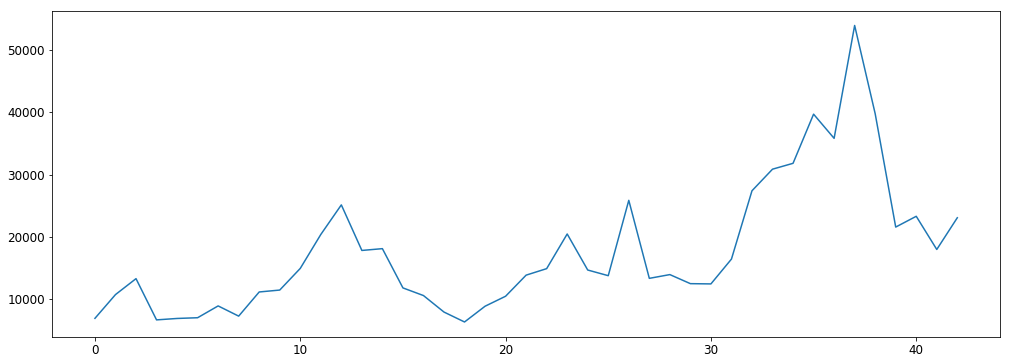

In [26]:
# Aggregate
plt.plot(list(wdf.groupby(['year','month']).mean().Energy))
# wdf['Date'].dt.month//2

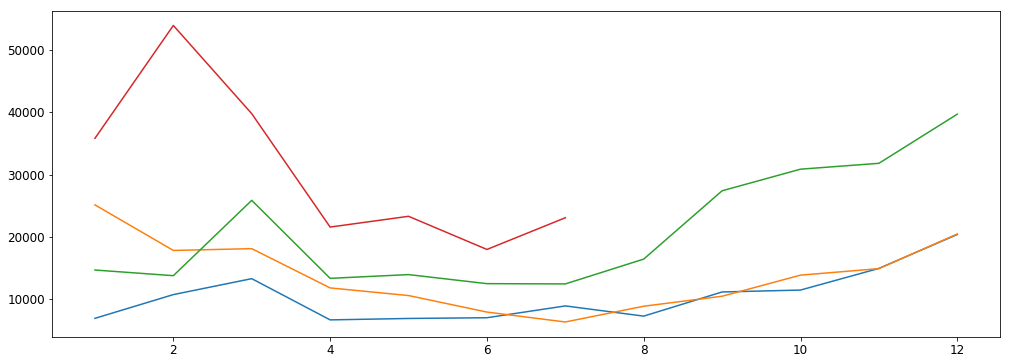

In [27]:
plt.plot(wdf.groupby(['month','year']).mean().Energy.unstack())
pass

- look at different temporal resolutions for seasonality
- peaks in end of year, dips in middle (June)
- seasonality is defined by the whole x axis (so yearly in this case, but agg to see clearer picture)
- below can see upward trend in energy
- can also see daily seasonality

In [218]:
len(xdf.groupby(['year','week']))

# pd.date_range(a,periods=80,freq='w')
# len(list(xdf.groupby(['year','week']).max().Energy))

80

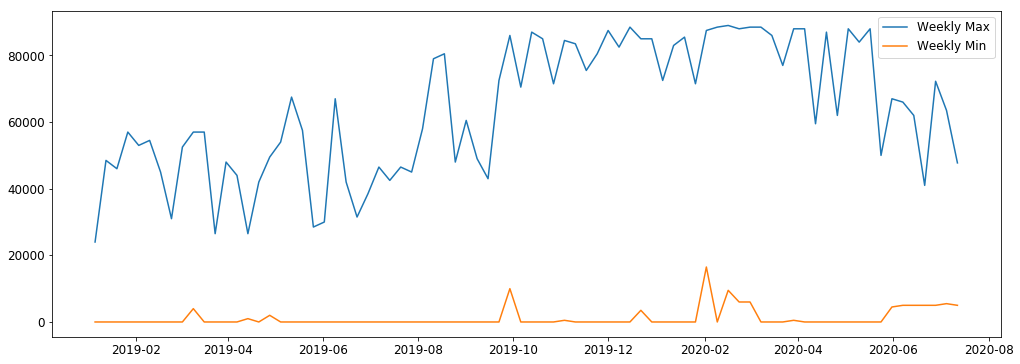

In [220]:
#Wind Prod range
a = pd.datetime(2019,1,1)
b = pd.datetime(2021,1,10)
xdf = wdf[(wdf.Date >= a) & (wdf.Date < b)]
period = len(xdf.groupby(['year','week']))
date_range = pd.date_range(a,periods=period,freq='w')

plt.plot(date_range, list(xdf.groupby(['year','week']).max().Energy), label='Weekly Max')
plt.plot(date_range, list(xdf.groupby(['year','week']).min().Energy), label='Weekly Min')
plt.legend()

### Energy Diff

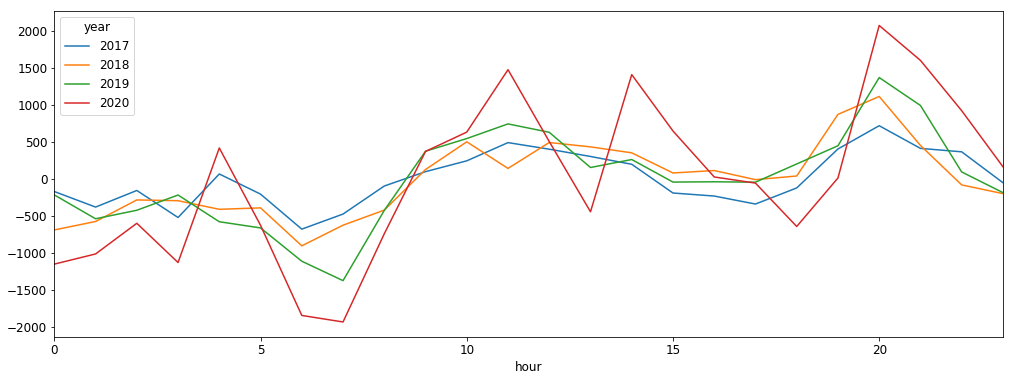

In [29]:
wdf.groupby(['hour','year']).mean().Energydiff.unstack().plot()
pass

- 2020 is probably more eratic because you dont have the whole year of data
- note that when you difference the data, the trend in year dissappear

### Energy diff18

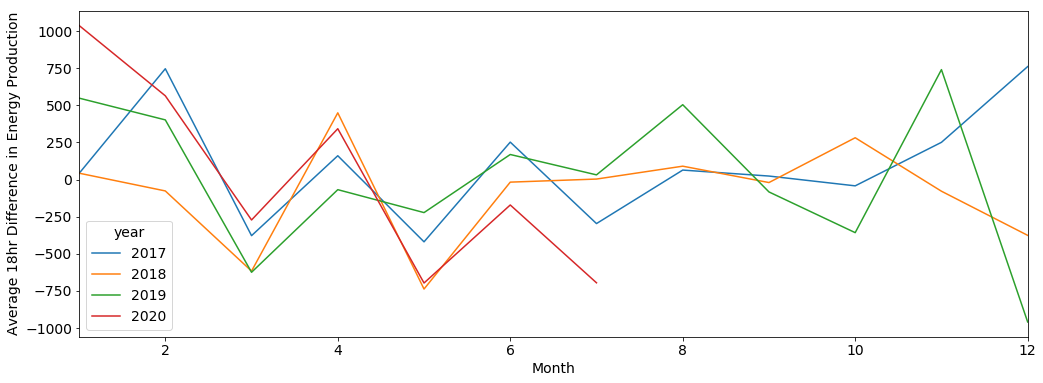

In [232]:
wdf.groupby(['month','year']).mean().Energydiff18.unstack().plot()
plt.xlabel('Month')
plt.ylabel('Average 18hr Difference in Energy Production')
pass

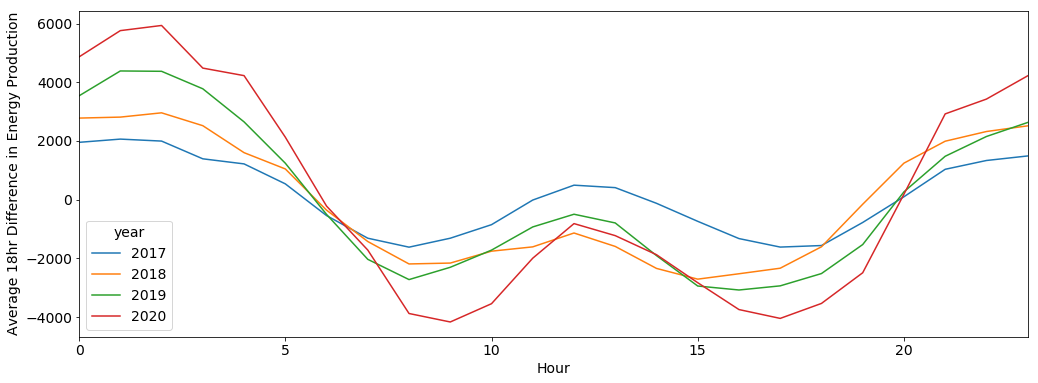

In [230]:
wdf.groupby(['hour','year']).mean().Energydiff18.unstack().plot()
plt.xlabel('Hour')
plt.ylabel('Average 18hr Difference in Energy Production')
pass

- can see diff18 daily seasonality

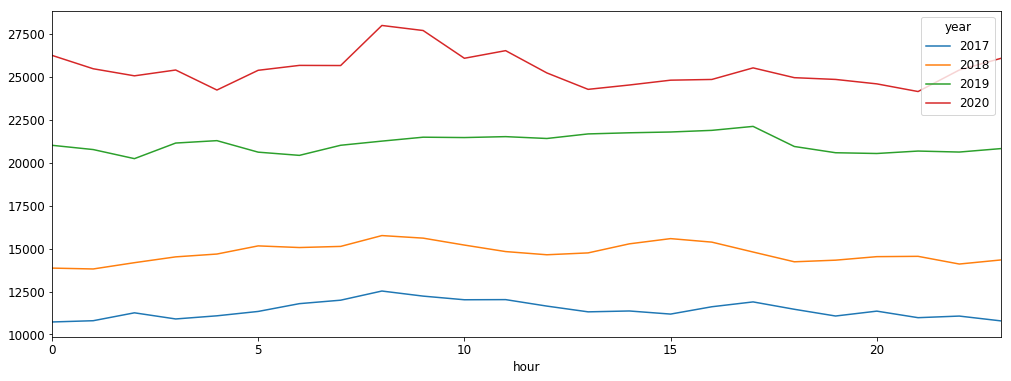

In [31]:
wdf.groupby(['hour','year']).std().Energydiff18.unstack().plot()
pass

- can see SD increasing through the years

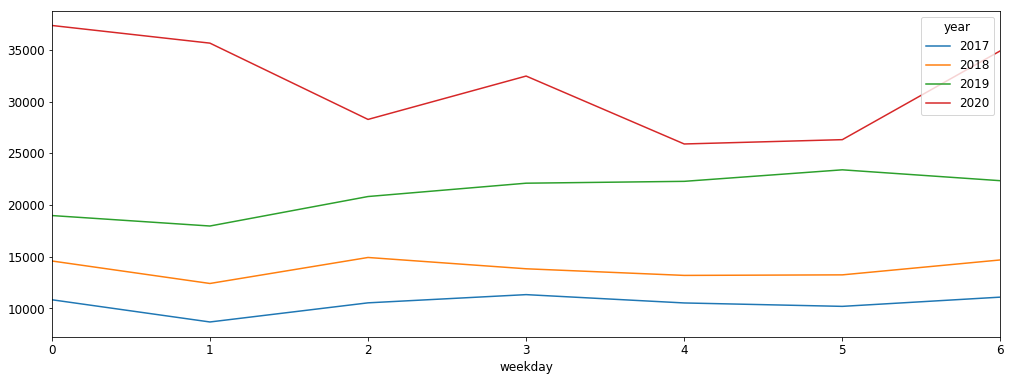

In [32]:
wdf.groupby(['weekday','year']).mean().Energy.unstack().plot()

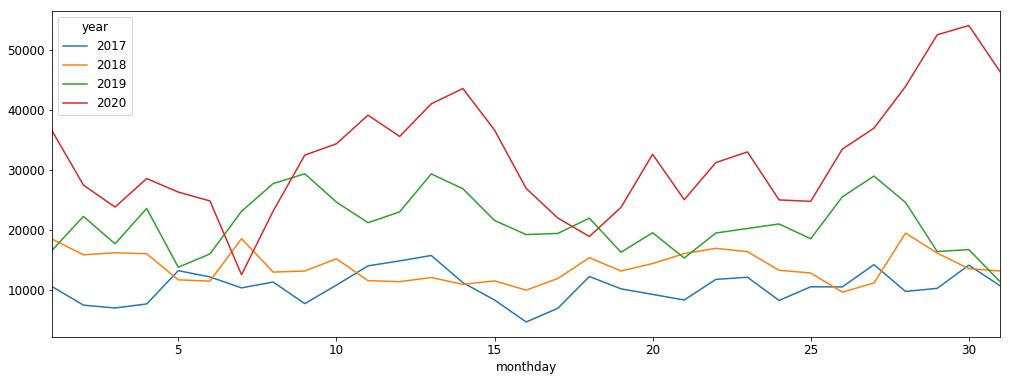

In [33]:
wdf.groupby(['monthday','year']).mean().Energy.unstack().plot()

### Speed

- Data from website

In [34]:
speed_df = pd.read_csv("Datasets/speed-guitrancourt.csv", names=['Date', 'Speed'])
speed_df['Date']= pd.to_datetime(speed_df['Date']) 
speed_df.set_index('Date', inplace=True)

In [35]:
speed_df.head()

,Speed
Date,
2017-01-01 00:00:00,1.860000
2017-01-01 01:00:00,1.961667
2017-01-01 02:00:00,2.063333
2017-01-01 03:00:00,2.165000
2017-01-01 04:00:00,2.266667


In [36]:
speed_df.shape

(31159, 1)

In [37]:
speed_df.describe()
# speed_df.info()

,Speed
count,31159.000000
mean,3.473840
std,1.770617
min,0.070000
25%,2.153333
50%,3.180000
75%,4.456667
max,12.860000


In [38]:
speed_df.Speed.isna().sum()

0

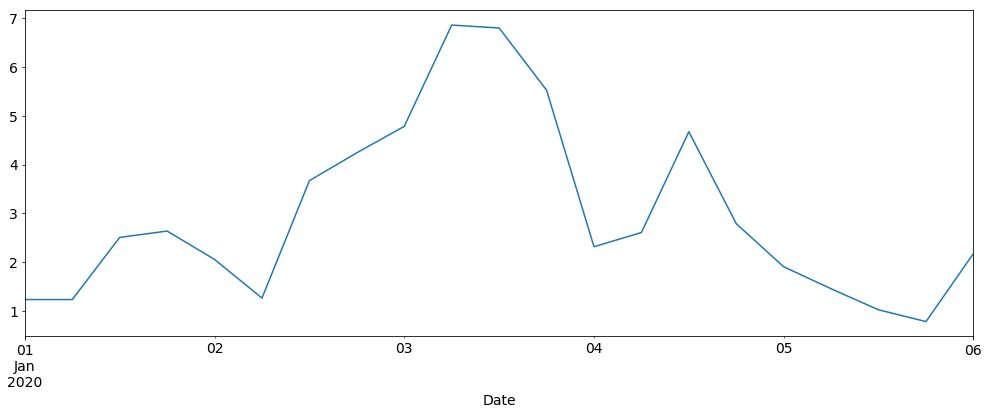

In [282]:
speed_df[pd.datetime(2020,1,1,0):pd.datetime(2020,1,6,0)].Speed.plot()

- might want to change interpolation

# Correlations (Energy production and wind speed data)

In [40]:
adf = pd.read_csv('Datasets/all_data.csv', header=None)

In [41]:
adf.drop([33,34,35], axis=1, inplace=True)

In [42]:
adf.shape

(31181, 33)

In [43]:
datelist = pd.date_range(datetime(2017,1,1,0), periods=adf.shape[0],freq='H').tolist()
print(datelist.index(datetime(2019,8,1,0)))
adf['datetime'] = datelist
adf.set_index('datetime', drop=True, inplace=True)

22608


In [264]:
adf.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,              17,              18,              19,
                    20,              21,              22,              23,
                    24,              25,              26,              27,
                    28,              29,              30,              31,
                    32,       '0diff18',       '1diff18',       '2diff18',
             '3diff18',       '4diff18',       '5diff18',       '6diff18',
             '7diff18',       '8diff18',      '17diff18',      '18diff18',
            '19diff18',      '20diff18',      '21diff18',      '22diff18',
            '23diff18',      '24diff18',  '9EWdirection', '10EWdirection',
       '11EWdirection', '

In [45]:
adf[list(range(0,9))+list(range(17,25))].tail(29)

,0,1,2,3,4,5,6,7,8,17,18,19,20,21,22,23,24
datetime,,,,,,,,,,,,,,,,,
2020-07-22 00:00:00,53000.0,4.18,4.67,4.51,4.36,4.38,4.52,4.53,4.53,4.37,4.48,4.45,3.94,3.98,4.43,4.42,4.42
2020-07-22 01:00:00,54750.0,4.14,4.58,4.46,4.30,4.32,4.43,4.47,4.47,4.27,4.40,4.37,3.90,3.94,4.36,4.34,4.34
2020-07-22 02:00:00,47000.0,4.10,4.49,4.40,4.24,4.25,4.35,4.41,4.41,4.18,4.32,4.29,3.86,3.90,4.28,4.27,4.27
2020-07-22 03:00:00,40500.0,4.06,4.41,4.34,4.18,4.19,4.26,4.36,4.36,4.08,4.24,4.21,3.82,3.86,4.21,4.19,4.19
2020-07-22 04:00:00,36000.0,4.02,4.32,4.29,4.12,4.12,4.18,4.30,4.30,3.99,4.16,4.12,3.78,3.82,4.14,4.11,4.11
2020-07-22 05:00:00,23000.0,3.99,4.23,4.23,4.05,4.06,4.09,4.24,4.24,3.89,4.08,4.04,3.74,3.77,4.07,4.03,4.03
2020-07-22 06:00:00,14750.0,3.95,4.14,4.18,3.99,4.00,4.01,4.18,4.18,3.79,4.00,3.96,3.70,3.73,3.99,3.96,3.96
2020-07-22 07:00:00,10250.0,3.91,4.06,4.12,3.93,3.93,3.92,4.13,4.12,3.70,3.92,3.88,3.67,3.69,3.92,3.88,3.88
2020-07-22 08:00:00,6750.0,3.87,3.97,4.07,3.87,3.87,3.84,4.07,4.06,3.60,3.83,3.80,3.63,3.65,3.85,3.80,3.80


- 0 = Energy Production
- {1-8} = Wind Speed at Station i (Model A)
- {9-16} = Wind Direction at Station i (Model A)
- {17-24} = Wind Speed at Station i (Model B)
- {25-32} = Wind Direction at Station i (Model B)

In [46]:
adf.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,...,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000
mean,17552.544017,3.472652,3.318399,3.568020,3.482390,3.468211,3.501291,3.535303,3.535449,190.603129,...,4.060813,4.059977,189.039361,184.073945,181.160995,176.683905,177.088430,181.267930,180.514047,180.504137
std,19122.835409,1.770682,1.679938,1.780853,1.732855,1.730266,1.767502,1.765277,1.765734,103.247165,...,2.070479,2.070441,102.946789,105.506135,105.090937,103.895907,104.106083,105.325665,105.087687,105.086614
min,0.000000,0.070000,0.110000,0.170000,0.110000,0.070000,0.020000,0.140000,0.130000,0.000000,...,0.060000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3500.000000,2.150000,2.120000,2.330000,2.270000,2.250000,2.260000,2.310000,2.310000,95.000000,...,2.530000,2.530000,93.000000,81.170000,73.330000,67.830000,68.330000,74.500000,72.500000,72.500000
50%,10500.000000,3.180000,2.990000,3.190000,3.100000,3.090000,3.120000,3.160000,3.160000,212.000000,...,3.710000,3.710000,209.000000,205.500000,205.670000,203.330000,203.500000,205.500000,205.330000,205.330000
75%,25000.000000,4.450000,4.210000,4.450000,4.360000,4.340000,4.390000,4.410000,4.410000,270.330000,...,5.210000,5.210000,269.000000,261.670000,258.670000,252.000000,252.330000,258.500000,258.000000,258.000000
max,89000.000000,12.860000,13.360000,13.470000,13.260000,13.180000,13.350000,13.290000,13.300000,359.830000,...,13.870000,13.850000,359.830000,359.830000,359.830000,359.830000,359.830000,359.830000,359.830000,359.830000


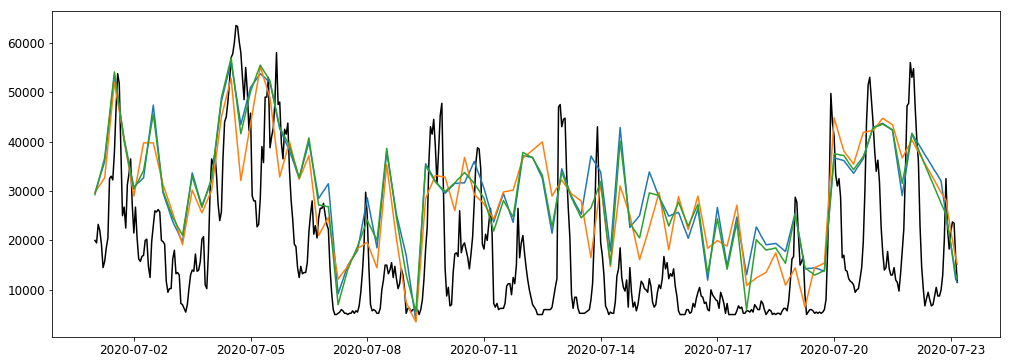

In [47]:
xdf= adf[pd.datetime(2020,7,1):pd.datetime(2021,1,1)]
plt.plot(xdf[0], 'k')
plt.plot(xdf[8]*9200)
plt.plot(xdf[5]*9200)
plt.plot(xdf[6]*9200)

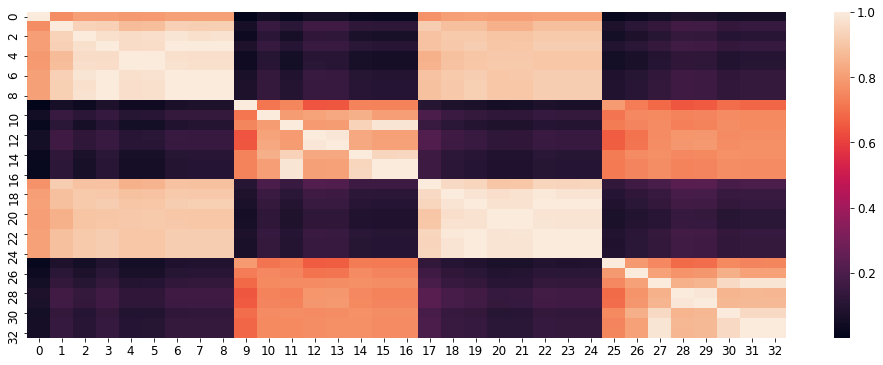

In [48]:
corrMatrix = adf.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

- There is no negative correlation
- direction needs to be tweaked
- wind speeds are more correlated to each other than to wind energy
- can draw each graph individually to see relationship

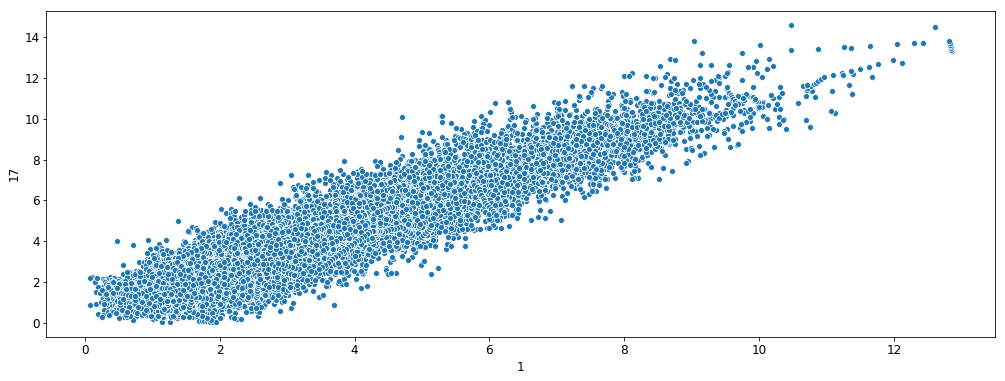

In [49]:
sns.scatterplot(x=1, y=17, data=adf)

- looks like a cubic graph

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

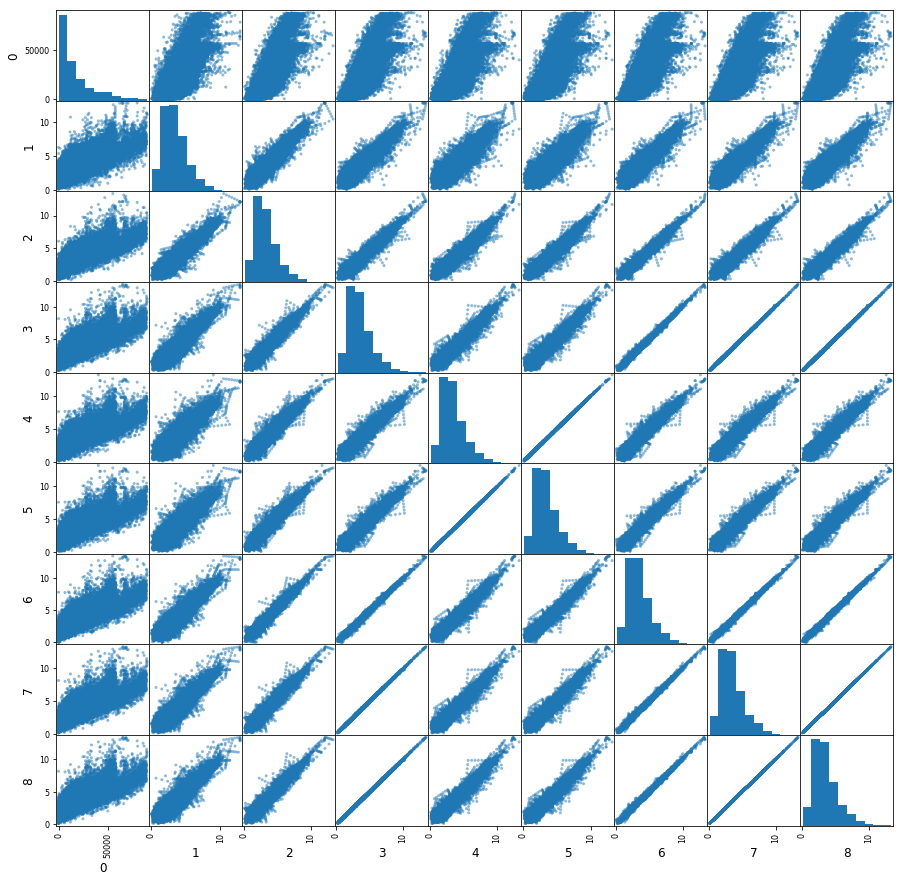

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(adf[[0,1,2,3,4,5,6,7,8]], ax=ax)
plt.plot()

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[]

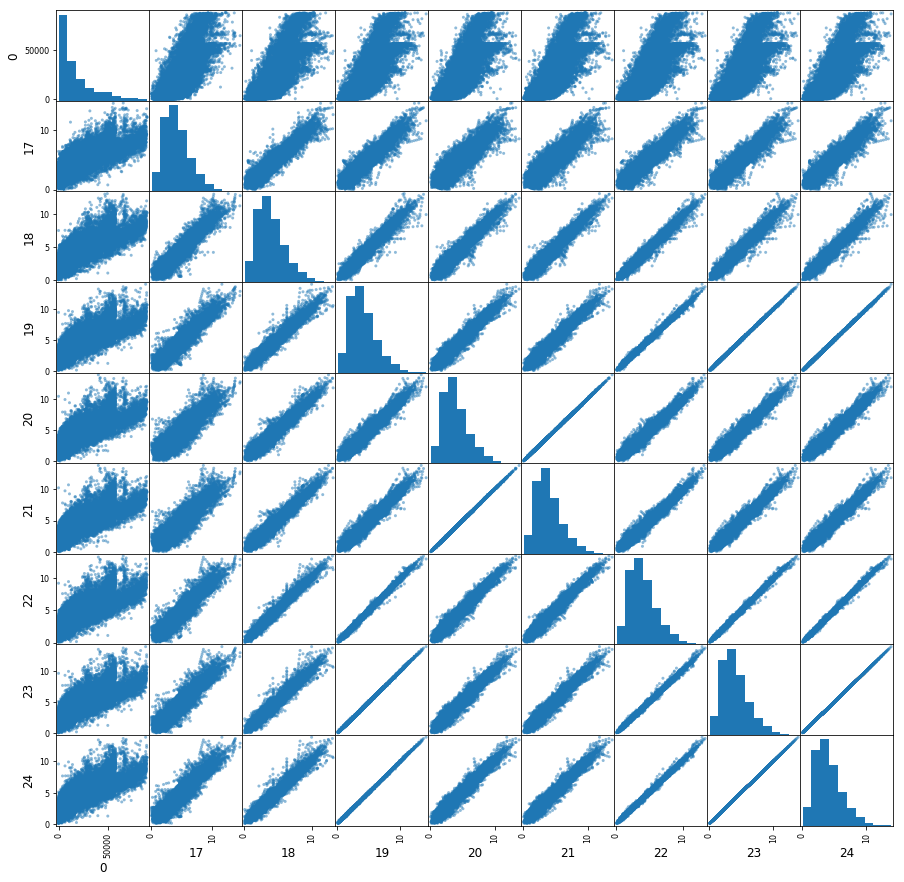

In [51]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(adf[[0,17,18,19,20,21,22,23,24]], ax=ax)
plt.plot()

### Correlation with wind speed lags

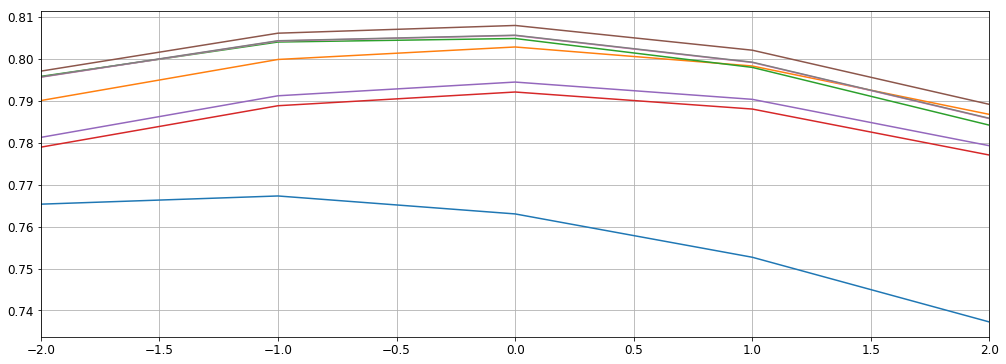

In [52]:
idx = range(-2,3)
for wind_station in range(1,9):
    cor_list = pd.Series([adf[0].shift(periods=i).corr(adf[wind_station]) for i in idx], index=idx)
    cor_list.plot(grid=True)

- see correlation with the lags of wind and energy (the peak should be at 0, but we want to confirm that)
- station 1 has the lowest correlation with energy, and its peak is at -1, might just be fluke
- but can also see that the prev value is a better correlated thant the later forecast (so current wind forecast can better predict T+1's energy production better)

In [53]:
corr_list = pd.Series([adf[0].corr(adf[i]) for i in range(1,9)], index=range(1,9))
corr_list.sort_values()

1    0.763025
4    0.792103
5    0.794476
2    0.802842
3    0.804866
7    0.805577
8    0.805648
6    0.807975
dtype: float64

- best are 6,8,7,3,2

### Correlation with Energy diff18

In [54]:
adf['0diff18'] = adf[0].diff(18)

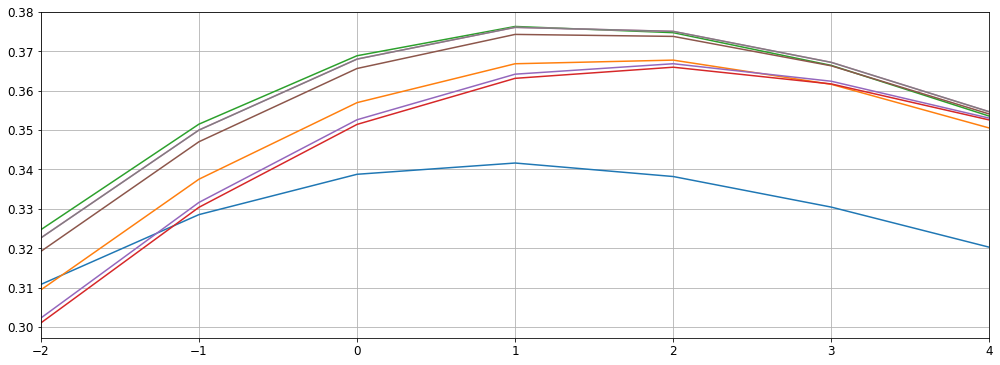

In [55]:
idx = range(-2,5)
for wind_station in range(1,9):
    cor_list = pd.Series([adf['0diff18'].shift(periods=i).corr(adf[wind_station]) for i in idx], index=idx)
    cor_list.plot(grid=True)

- shift 1, means row 0 is NaN
- correlation seems alot lesser now
- seems that T17 in wind can predict T18 difference better

In [56]:
corr_list = pd.Series([adf['0diff18'].shift(periods=1).corr(adf[i]) for i in range(1,9)], index=range(1,9))
corr_list.sort_values()

1    0.341600
4    0.363092
5    0.364147
2    0.366793
6    0.374239
7    0.376026
8    0.376033
3    0.376254
dtype: float64

### Correlations of Energy diff18 and wind diff18

In [57]:
RNG = list(range(1,9)) + list(range(17,25))
for i in RNG:
    adf[str(i)+'diff18'] = adf[i].diff(18)

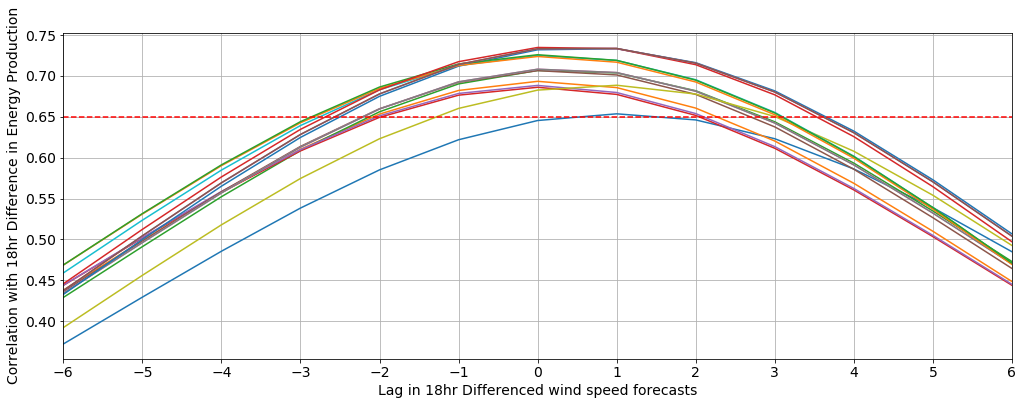

In [288]:
idx = range(-6,7)
rng = list(range(1,9)) + list(range(17,25))

for wind_station in RNG:
    cor_list = pd.Series([adf['0diff18'].corr(adf[str(wind_station)+'diff18'].shift(periods=i))
                          for i in idx], index=idx)
    cor_list.plot(grid=True)

plt.xticks(idx)
plt.plot([-6,6],[0.65,0.65],'--',color='r')
plt.ylabel('Correlation with 18hr Difference in Energy Production')
plt.xlabel('Lag in 18hr Differenced wind speed forecasts')

- shift 1, means row 0 is NaN
- correlation seems alot lesser now
- seems that T17 in wind can predict T18 difference better

In [59]:
corr_list = pd.Series([adf['0diff18'].corr(adf[str(i)+'diff18']) for i in RNG], index=RNG)
corr_list.sort_values()

1     0.645437
17    0.682624
4     0.686076
5     0.688341
2     0.693345
6     0.706420
3     0.706668
7     0.708159
8     0.708160
20    0.723733
18    0.724952
21    0.725869
19    0.731922
23    0.733116
24    0.733163
22    0.734753
dtype: float64

In [60]:
xdf = adf[pd.datetime(2017,1,1) : pd.datetime(2019,1,7)]
corr_list = pd.Series([xdf['0diff18'].corr(xdf[str(i)+'diff18']) for i in RNG], index=RNG)
corr_list.sort_values()

1     0.634640
17    0.692938
2     0.702811
4     0.705326
5     0.707186
3     0.718413
6     0.718925
8     0.720363
7     0.720396
18    0.737456
20    0.745675
21    0.747021
19    0.751744
22    0.752543
23    0.753163
24    0.753175
dtype: float64

In [61]:
# same as abv diff dates
xdf = adf[pd.datetime(2019,10,1) : pd.datetime(2021,1,7)]
corr_list = pd.Series([xdf['0diff18'].corr(xdf[str(i)+'diff18']) for i in RNG], index=RNG)
corr_list.sort_values()

1     0.721103
4     0.735194
5     0.738122
17    0.738645
2     0.754867
6     0.766329
3     0.767804
7     0.769035
8     0.769037
20    0.777708
21    0.780653
19    0.785479
23    0.786596
24    0.786686
18    0.788167
22    0.791686
dtype: float64

- Clusters in order
    - {6}
    - {3,7,8}
    - {2}
    - {4,5}
    - {1}
- model 2 has stronger correlation with energy

# Correlations with Bearings

In [62]:
adf[9][:16]

datetime
2017-01-01 00:00:00    212.00
2017-01-01 01:00:00    209.00
2017-01-01 02:00:00    206.00
2017-01-01 03:00:00    203.00
2017-01-01 04:00:00    200.00
2017-01-01 05:00:00    197.00
2017-01-01 06:00:00    194.00
2017-01-01 07:00:00    192.67
2017-01-01 08:00:00    191.33
2017-01-01 09:00:00    190.00
2017-01-01 10:00:00    188.67
2017-01-01 11:00:00    187.33
2017-01-01 12:00:00    186.00
2017-01-01 13:00:00    187.00
2017-01-01 14:00:00    188.00
2017-01-01 15:00:00    189.00
Name: 9, dtype: float64

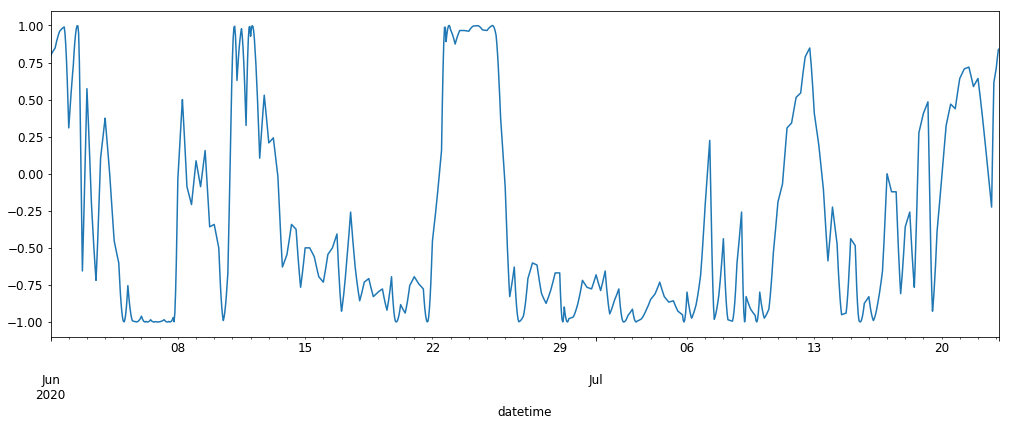

In [63]:
adf[16][pd.datetime(2020,6,1):].apply(lambda x:math.sin(x * math.pi/180)).plot()

- This shows the E/W direction of the wind, no relation

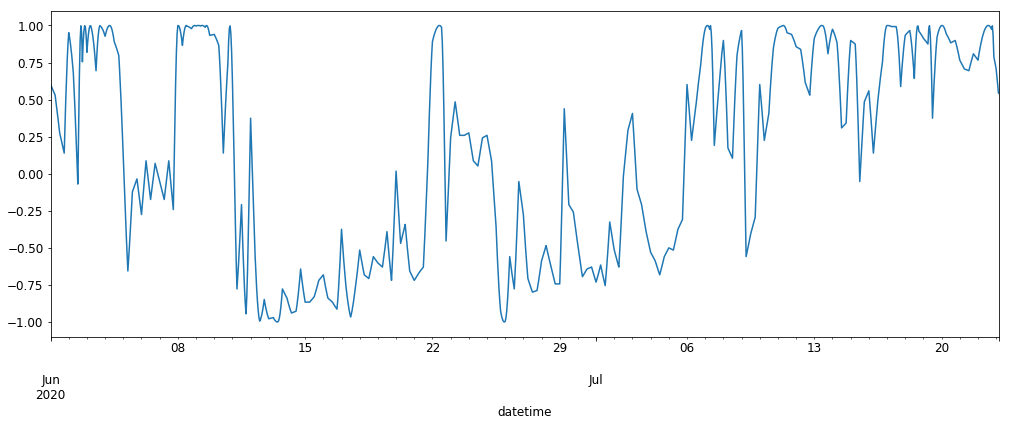

In [64]:
adf[16][pd.datetime(2020,6,1):].apply(lambda x:math.cos(x * math.pi/180)).plot()

- This show N/W direction of wind, no relation

### Correlation with Energy and Direction

In [65]:
DIRN_RNG = list(range(9,17)) + list(range(25,33))
for i in DIRN_RNG:
    adf[str(i) + 'EWdirection'] = adf[i].apply(lambda x:math.sin(x * math.pi/180))

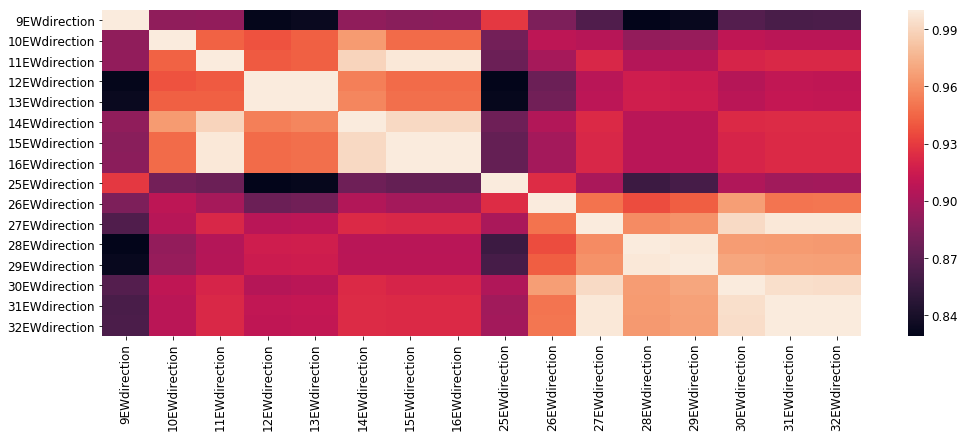

In [66]:
DIRN_RNG_EW = list(map(lambda i: str(i) + 'EWdirection', DIRN_RNG))
corrMatrix = adf[DIRN_RNG_EW].corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

- directions are very correlated as well
- maybe can segment data according to direction and find correlations

In [67]:
for i in DIRN_RNG:
    adf[str(i) + 'NSdirection'] = adf[i].apply(lambda x:math.cos(x * math.pi/180))

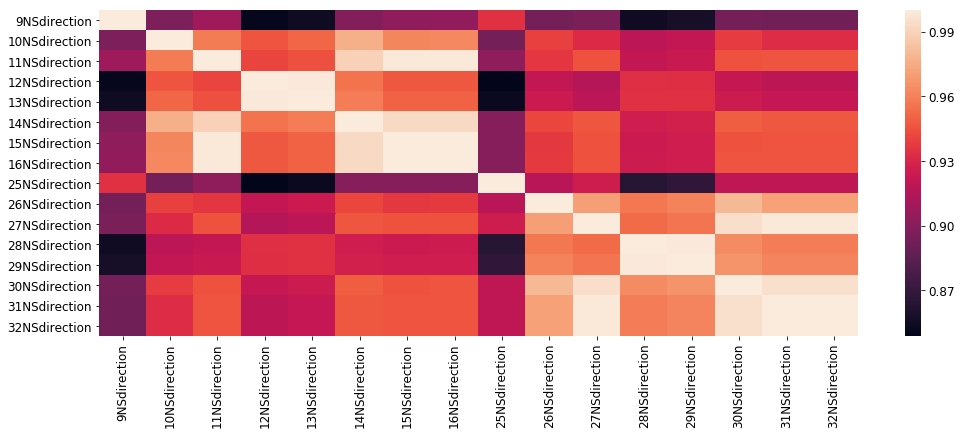

In [68]:
DIRN_RNG_NS = list(map(lambda i: str(i) + 'NSdirection', DIRN_RNG))
corrMatrix = adf[DIRN_RNG_NS].corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

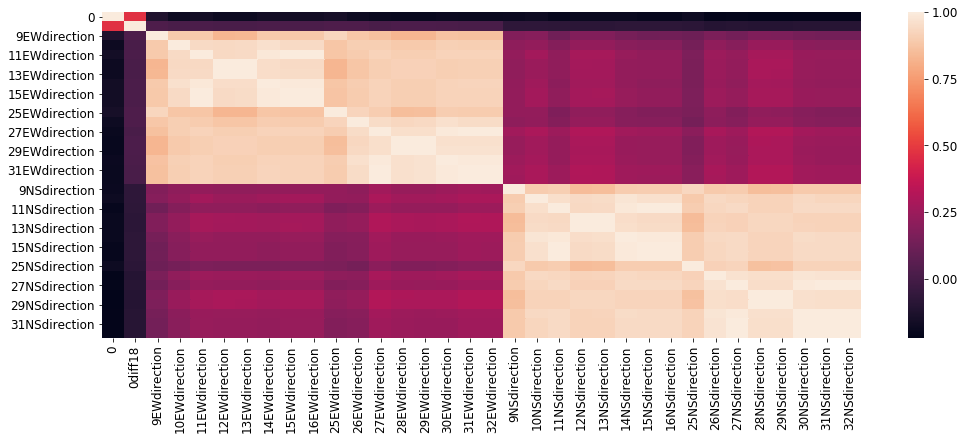

In [69]:
corrMatrix = adf[[0, '0diff18'] + DIRN_RNG_EW + DIRN_RNG_NS].corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

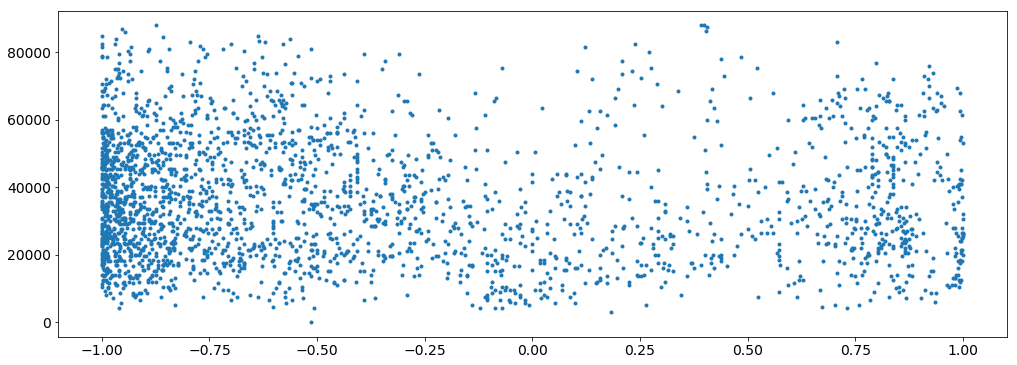

In [249]:
xdf = adf[(adf[1]>5) & (adf[1]<6)]
plt.scatter(xdf['16EWdirection'], xdf[0], marker='.')

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


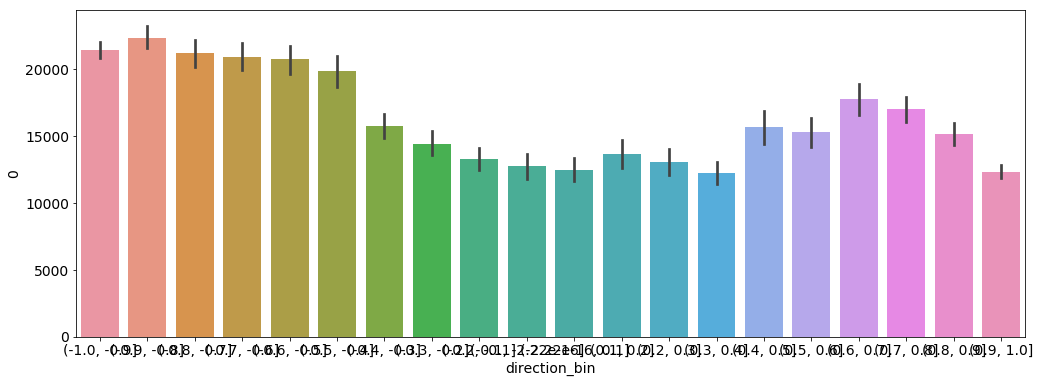

In [274]:
xdf = adf.copy()[:]
bins = np.arange(-1,1.01,0.1)
xdf['direction_bin'] = pd.cut(xdf['16EWdirection'], bins)
sns.barplot('direction_bin', 0, data=xdf)

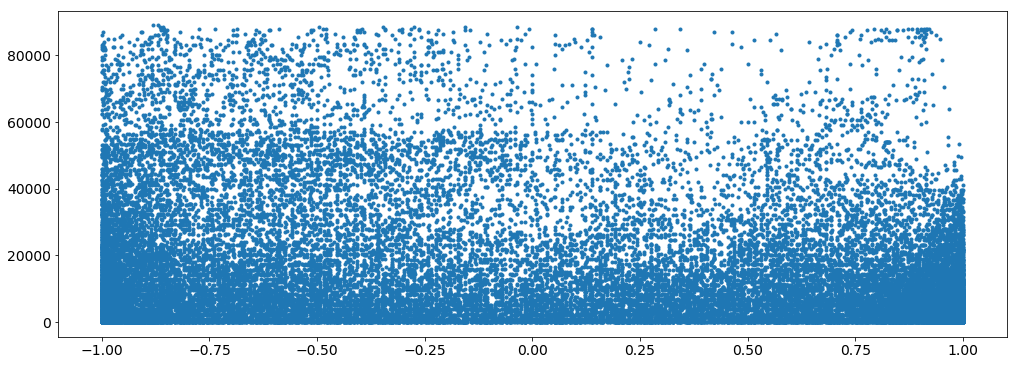

In [248]:
xdf = adf[:]
plt.scatter(xdf['16NSdirection'], xdf[0], marker='.')

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


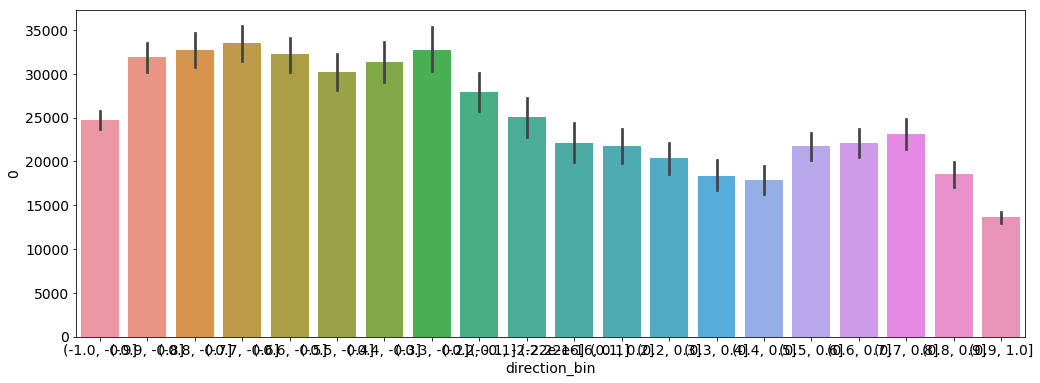

In [275]:
xdf = adf.copy()[pd.datetime(2019,1,1):]
bins = np.arange(-1,1.01,0.1) #[-1,-0.5,0,0.5,1]
xdf['direction_bin'] = pd.cut(xdf['16NSdirection'], bins)
sns.barplot('direction_bin', 0, data=xdf)

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


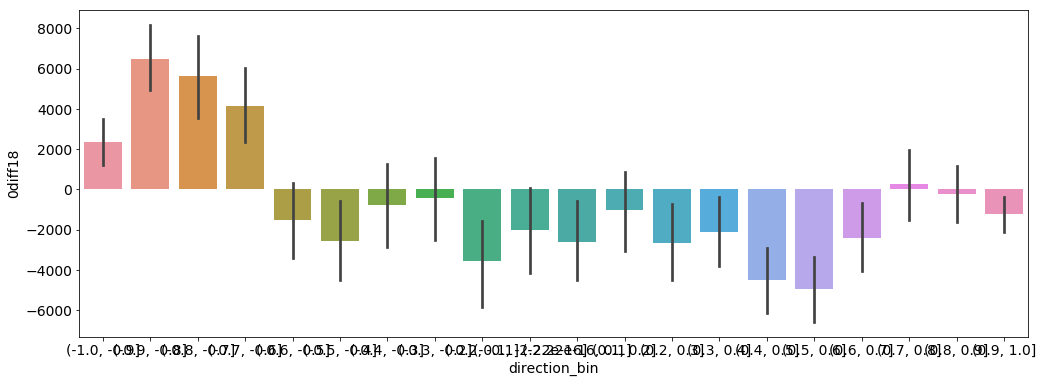

In [276]:
xdf = adf.copy()[pd.datetime(2019,1,1):]
bins = np.arange(-1,1.01,0.1) #[-1,-0.5,0,0.5,1]
xdf['direction_bin'] = pd.cut(xdf['16NSdirection'], bins)
sns.barplot('direction_bin', '0diff18', data=xdf)

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


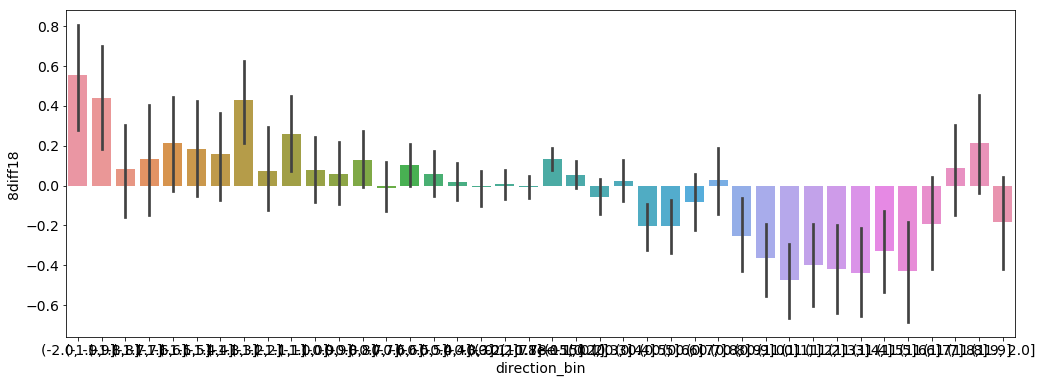

In [281]:
xdf = adf.copy()[:]
xdf['16NSdirection_diff18'] = xdf['16NSdirection'].diff(18)
bins = np.arange(-2,2.01,0.1)
xdf['direction_bin'] = pd.cut(xdf['16NSdirection_diff18'], bins)
sns.barplot('direction_bin', '8diff18', data=xdf)

In [263]:
adf.columns

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,              10,              11,
                    12,              13,              14,              15,
                    16,              17,              18,              19,
                    20,              21,              22,              23,
                    24,              25,              26,              27,
                    28,              29,              30,              31,
                    32,       '0diff18',       '1diff18',       '2diff18',
             '3diff18',       '4diff18',       '5diff18',       '6diff18',
             '7diff18',       '8diff18',      '17diff18',      '18diff18',
            '19diff18',      '20diff18',      '21diff18',      '22diff18',
            '23diff18',      '24diff18',  '9EWdirection', '10EWdirection',
       '11EWdirection', '

### Direction and Speed

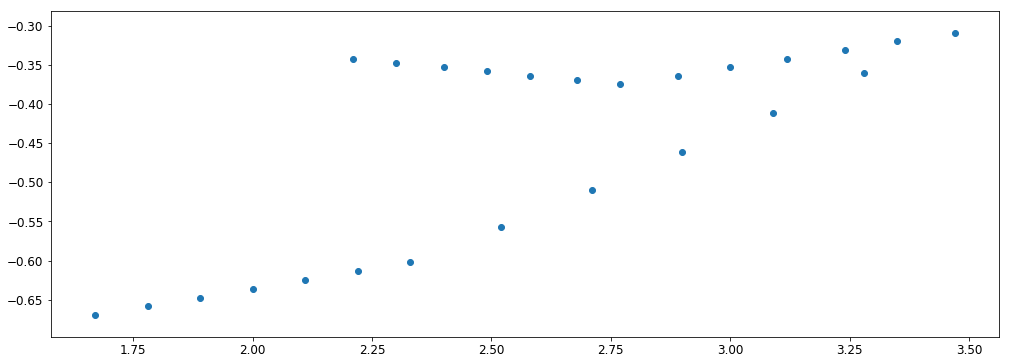

In [72]:
# see dirn and wind speed relationship
xdf = adf[pd.datetime(2017,1,1) : pd.datetime(2017,1,2)]
plt.scatter(xdf[8], xdf['16EWdirection'])
# xdf.plot(8, '16EWdirection', style='o') # This plot is not visually nice

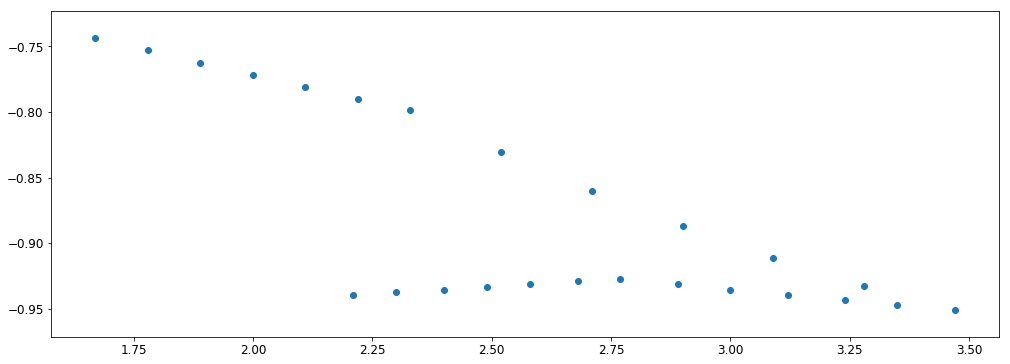

In [73]:
# see dirn and wind speed relationship
xdf = adf[pd.datetime(2017,1,1) : pd.datetime(2017,1,2)]
plt.scatter(xdf[8], xdf['16NSdirection'])


- The points move through times quite continously and are not random

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


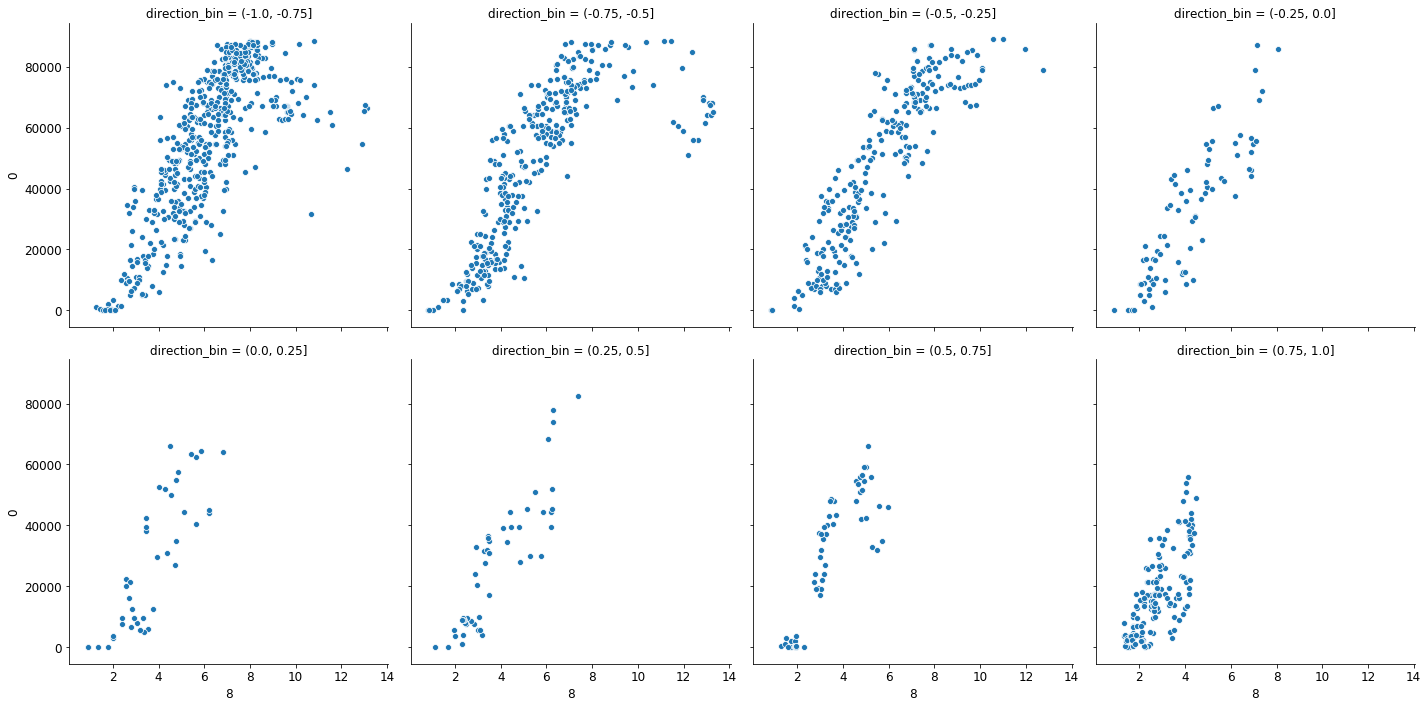

In [74]:
xdf = adf[pd.datetime(2020,1,1) : pd.datetime(2020,3,2)]
bins = np.arange(-1,1.01,0.25) #[-1,-0.5,0,0.5,1]
xdf['direction_bin'] = pd.cut(xdf['16EWdirection'], bins)
sns.relplot(x=8,y=0, col='direction_bin', data=xdf, legend=False, col_wrap= 4)
# ax = sns.scatterplot(x=8,y=0, hue='16EWdirection', data=xdf, legend=False)
# ax = sns.scatterplot(x=8,y=0, hue='direction_bin', data=xdf, legend=False)

In [75]:
xdf = adf[:]
bins = [-1,0,1]
xdf['direction_bin'] = pd.cut(xdf['16NSdirection'], bins)
xdf.direction_bin.value_counts()

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(-1, 0]    16053
(0, 1]     15096
Name: direction_bin, dtype: int64

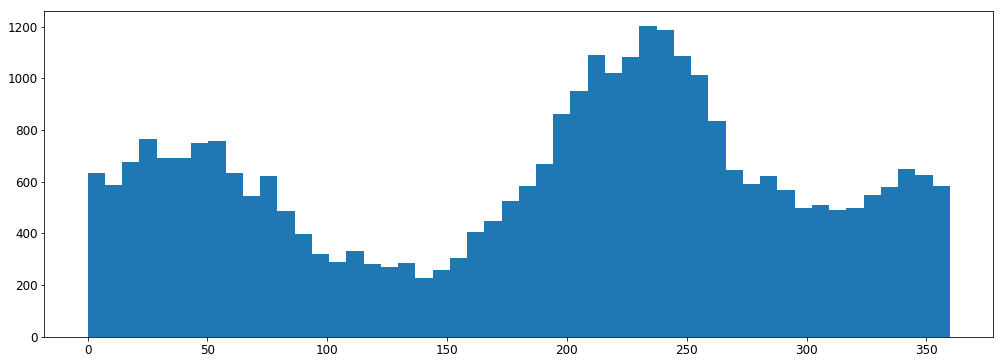

In [76]:
plt.hist(adf[16], bins=50)
pass

- can see wind tends to blow in SW and NE direction predominantly

# Predictions

In [77]:
pdf198 = pd.read_csv("Datasets/2019-8-pred-raw.csv", header=None) # relu loss
pdf198_un = pd.read_csv("Datasets/2019-8-pred-unnormalised-relu.csv", header=None)
pdf9505 = pd.read_csv("Datasets/2019-8-train-test-95-05-pred-raw.csv", header=None)

In [78]:
# mean = 17542.619668017756
# sd = 19134.131586041487

# pdf['pred'] = (pdf[0] * sd) + mean
# pdf['actu'] = (pdf[1] * sd) + mean

In [79]:
pdf198.tail()

,0,1
2535,-1.13869,-0.496247
2536,-1.03764,-0.635422
2537,-1.14759,-0.615540
2538,-1.21730,-0.486306
2539,-1.21312,-0.625481


In [80]:
pdf9505.tail()

,0,1
418,-0.939629,-0.496247
419,-1.101410,-0.635422
420,-1.191030,-0.615540
421,-1.058770,-0.486306
422,-1.088970,-0.625481


In [81]:
print(pdf198[-423:].shape, pdf9505.shape)

(423, 2) (423, 2)


In [82]:
def relu_loss(row):
    x = row[0] - row[1]
    if x>0:
        return 2*x
    else:
        return -x
    
print(pdf9505.apply(lambda row: relu_loss(row), axis=1).mean())
print(pdf198[-423:].apply(lambda row: relu_loss(row), axis=1).mean())    

0.46508084749970563
0.5013902758482937


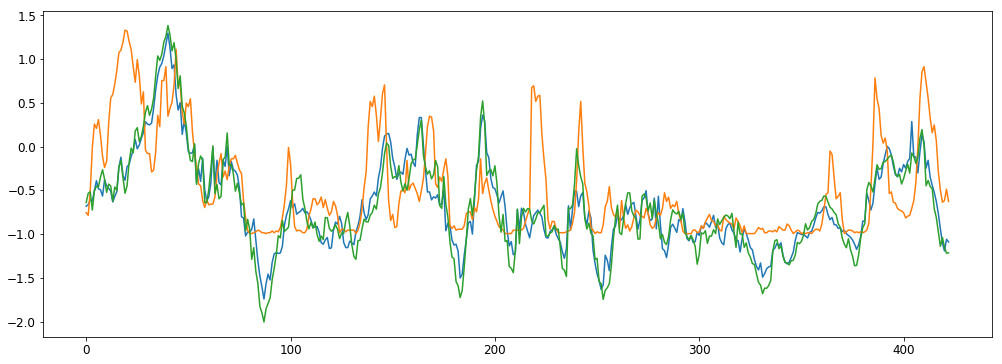

In [83]:
plt.plot(pdf9505)
plt.plot(pdf198[-423:].reset_index()[0])

# Trading Algo PnL

In [84]:
tdf = pd.read_csv('Datasets/trades.csv')
ndf = pd.read_csv("Datasets/2019-8-trades.csv")

In [85]:
tdf.tail()

,sale,buy,penalty,wasted,cash
9312,101013.1763,0.0,0.0,69006.8430,1.254409e+09
9313,47561.9797,0.0,0.0,92448.8550,1.254456e+09
9314,42682.3934,0.0,0.0,94827.6759,1.254499e+09
9315,44697.4088,0.0,0.0,77808.0682,1.254544e+09
9316,56787.1185,0.0,0.0,60716.8277,1.254601e+09


In [86]:
ndf.tail()

,sale,buy,penalty,wasted,cash
2535,36030.7696,0.0,0.0,138969.2304,227996138.0
2536,0.0000,0.0,0.0,140000.0000,227996138.0
2537,0.0000,0.0,0.0,145000.0000,227996138.0
2538,0.0000,0.0,0.0,177500.0000,227996138.0
2539,0.0000,0.0,0.0,142500.0000,227996138.0


In [87]:
ndf.shape

(2540, 5)

In [88]:
tdf.shape

(9317, 5)

In [89]:
trans_tdf = tdf[(9317-2540):]
trans_tdf['trans_cash'] = trans_tdf.cash - trans_tdf.cash[(9317-2540)] + tdf.cash[0]

c:\users\sival\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
trans_tdf.shape

(2540, 6)

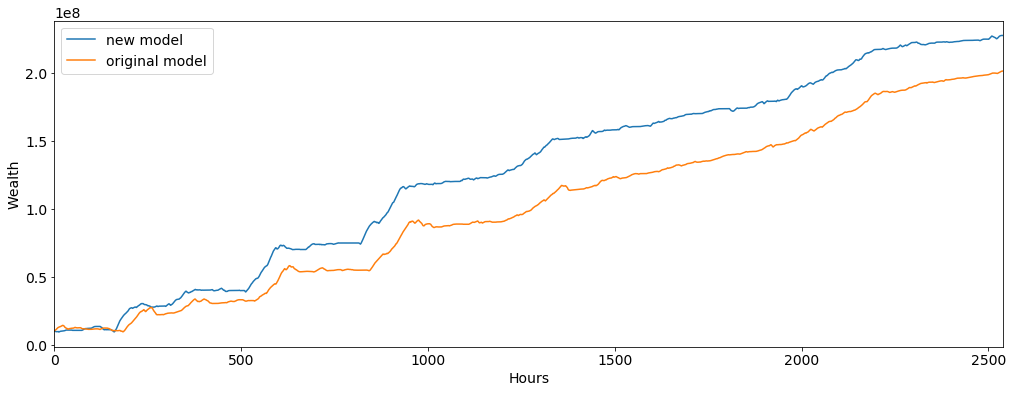

In [289]:
ndf.cash.plot(label='new model')
trans_tdf.reset_index().trans_cash.plot(label='original model')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Wealth')

# Test

In [112]:
raise Exception()

Exception: 

In [ ]:
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background
plt.plot(range(12))

In [ ]:
def euclidean_loss(x,y):
    return (x-y)**2
loss=0
for x,y in list(zip(data_df[0], predictions)):
    if ~np.isnan(y):
        loss += euclidean_loss(x,y)
loss/(~predictions.isna()).sum()

In [ ]:
print(len(wind_df[(wind_df.index >= pd.datetime(2017,1,1,0)) & (wind_df.index < pd.datetime(2018,1,1,0))][~wind_df.Energy.notnull()]))
print(len(wind_df[(wind_df.index >= pd.datetime(2018,1,1,0)) & (wind_df.index < pd.datetime(2019,1,1,0))][~wind_df.Energy.notnull()]))
print(len(wind_df[(wind_df.index >= pd.datetime(2019,1,1,0)) & (wind_df.index < pd.datetime(2020,1,1,0))][~wind_df.Energy.notnull()]))
print(len(wind_df[wind_df.index >= pd.datetime(2020,1,1,0)][~wind_df.Energy.notnull()]))

wind_df[wind_df.index < pd.datetime(2018,1,1,0)][~wind_df.Energy.notnull()]

In [ ]:
wind_df.fillna(method='ffill')[~wind_df.Energy.notnull()].describe()

In [ ]:
def plot_lag_correlations(stations, table, function_name, max_lag = 50, require_dengue_col = False):
    
    cor_sum = pd.Series([0 for i in range(max_lag)])
    
    for station in stations:
        if require_dengue_col:
            # note corr function ignores nan values
            cor_list = pd.Series(
                        [table[station].shift(periods=i).corr(weeklyavg['dengue_per_capita']) for i in range(max_lag)]
                        )
        else:
            cor_list = pd.Series(
                        [table[station].shift(periods=i).corr(table['dengue_per_capita']) for i in range(max_lag)]
                        )
        cor_list.plot(grid=True)
        cor_sum = cor_sum.add(cor_list)

    plt.xlabel('Lag')
    plt.ylabel('Correlation of %s and dengue_per_capita lagged by x'%function_name)
    
    plt.figure()
    cor_sum = cor_sum/len(stations) 
    cor_sum.plot(grid=True)
    plt.xlabel('Lag')
    plt.ylabel('Average Correlation')

In [ ]:
df = pd.read_csv("angerville-1.csv", skiprows=3)

In [ ]:
df

In [ ]:
wind_df[wind_df.index > pd.datetime(2000,1,1,0)].Energy.isna().sum()

In [ ]:
plt.acorr(list(tdf.pct_chg)+[0.0], maxlags=10)

In [ ]:
tdf = pd.read_csv('stock return.csv')
tdf.head()

In [ ]:
tdf[:1000].pct_chg.plot()

In [ ]:
L = [math.sin(i/180*math.pi) for i in range(720)]
plt.plot(L)

In [ ]:
result = [pd.Series(L).autocorr(n) for n in range(-700,719)]
plt.plot(result)

In [ ]:
x=[]
for i in range (100):
    x += list(wdf.groupby(('hour','year')).mean().Energydiff18.unstack()[2017])
idx = range(60)
s = pd.Series(x)
cor_list = pd.Series([s.shift(periods=i).corr(s) for i in idx], index=idx)
cor_list.plot(grid=True)

In [ ]:
mean = 17542.619668017756
sd = 19134.131586041487 
mi = 89000
ma = 0
print((mi -  mean)/sd)
(ma -  mean)/sd
